## **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Load the Dataset**
Dataset source: [Kaggle Dataset](https://www.kaggle.com/datasets/mojtaba142/hotel-booking?resource=download)

In [3]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/Dataset/hotel_booking.csv')

## **Exploratory Data Analysis and Data Cleaning**

In [4]:
#number of rows and columns
df.shape

(119390, 36)

In [37]:
#remove duplicate data
df.drop_duplicates()
df.shape

(118897, 31)

In [38]:
#columns in dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')

In [41]:
#Checkout first 6 rows of dataset
df.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


In [42]:
#Checkout last 5 rows of dataset
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,9
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,9
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,9
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,9
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,0,No Deposit,0,Transient,151.20,0,2,Check-Out,2017-09-07,9


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118897 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  object        
 1   is_canceled                     118897 non-null  int64         
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  object        
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  float64

In [44]:
#convert object column to date time
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118897 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  object        
 1   is_canceled                     118897 non-null  int64         
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  object        
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  float64

In [45]:
#summary status of object (categorical) column
object_col = df.describe(include = 'object')
print(object_col)

             hotel arrival_date_month    meal country market_segment  \
count       118897             118897  118897  118897         118897   
unique           2                 12       5     177              7   
top     City Hotel             August      BB     PRT      Online TA   
freq         79301              13852   91862   48585          56402   

       distribution_channel reserved_room_type assigned_room_type  \
count                118897             118897             118897   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97729              85600              73862   

       deposit_type customer_type reservation_status  
count        118897        118897             118897  
unique            3             4                  3  
top      No Deposit     Transient          Check-Out  
freq         104163         89173              74745  


Print unique values of each column

In [46]:
for col in object_col.columns:
  print(col)
  print(df[col].unique())
  print('-'*70)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' '

Total missing values in each column

In [47]:
#Missing values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Print after removal of null values

In [49]:
#summary statistics of numerical columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,month
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,6.334508
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,3.344185
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,3.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,6.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,9.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,12.000000


Plot adr column to check value range

<Axes: >

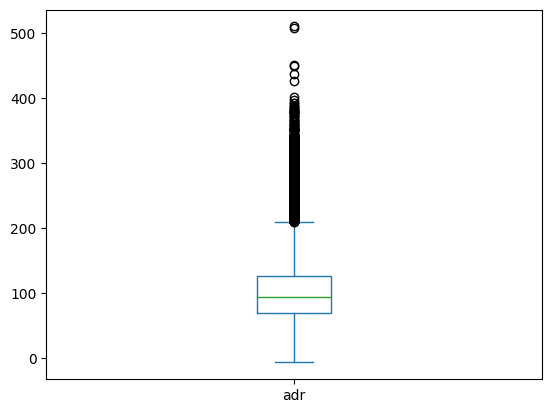

In [50]:
#check for outlier
df['adr'].plot(kind='box')

## **Data Analysis and Visualization**

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


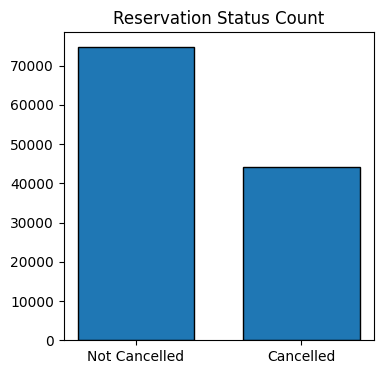

In [53]:
#count percentage of different values in a categorical column
cancelled_per = df['is_canceled'].value_counts(normalize = True)
print(cancelled_per)

plt.figure(figsize = (4,4))
plt.title("Reservation Status Count")
plt.bar(['Not Cancelled', 'Cancelled'], df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

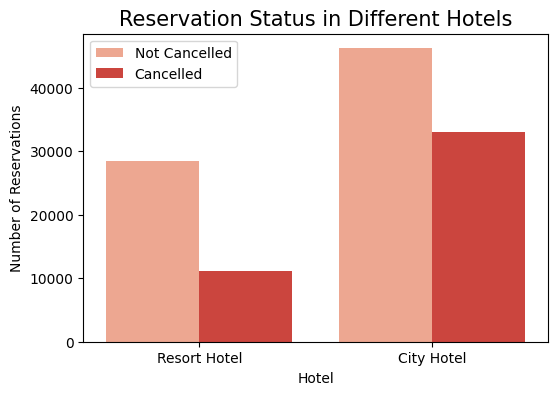

In [54]:
#Plot the status of hotels
plt.figure(figsize = (6,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Reds')
plt.title('Reservation Status in Different Hotels', size = 15)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

In [81]:
#Cancellation rate for Resort Hotel
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_h = resort_hotel['is_canceled'].value_counts(normalize=True)*100
print(resort_h)

0    72.024952
1    27.975048
Name: is_canceled, dtype: float64


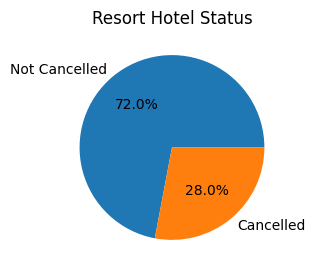

In [87]:
#plot pie chart for hotel status
status_r = ['Not Cancelled', 'Cancelled']
resort_pie = []
resort_pie.append(resort_h[0])
resort_pie.append(resort_h[1])
fig = plt.figure(figsize =(3, 3))
plt.pie(resort_pie, labels = status_r, autopct='%.1f%%')
plt.title("Resort Hotel Status")
plt.show()

In [88]:
#Cancellation rate for City Hotel
city_hotel = df[df['hotel'] == 'City Hotel']
city_h = city_hotel['is_canceled'].value_counts(normalize=True)*100
print(city_h)

0    58.291825
1    41.708175
Name: is_canceled, dtype: float64


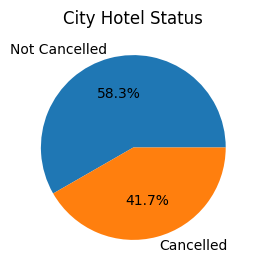

In [89]:
#plot pie chart for hotel status
status_c = ['Not Cancelled', 'Cancelled']
city_pie = []
city_pie.append(city_h[0])
city_pie.append(city_h[1])
fig = plt.figure(figsize =(3, 3))
plt.pie(city_pie, labels = status_c, autopct='%.1f%%')
plt.title("City Hotel Status")
plt.show()

From above calculation and pie chart, we can note that the cancellation percentage of city hotel is higher 41.7% than that of resort hotel 27.97%

In [92]:
#adr Average Daily Rate
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
print("Grouping ADR for resort hotel by reservation date")
print(resort_hotel, "\n")
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()
print("Grouping ADR for city hotel by reservation date")
print(city_hotel)

Grouping ADR for resort hotel by reservation date
                                adr
reservation_status_date            
2014-11-18                 0.000000
2015-01-01                61.966667
2015-01-02                 9.633750
2015-01-18                 0.000000
2015-01-21                37.301209
...                             ...
2017-09-08               101.012500
2017-09-09               147.778333
2017-09-10               145.272500
2017-09-12               153.570000
2017-09-14               105.930000

[913 rows x 1 columns] 

Grouping ADR for city hotel by reservation date
                                adr
reservation_status_date            
2014-10-17                62.800000
2015-01-01                62.063158
2015-01-20                76.500000
2015-01-30                61.400000
2015-02-17                76.500000
...                             ...
2017-09-03               137.172600
2017-09-04               116.925385
2017-09-05               154.000000
2017-09-06  

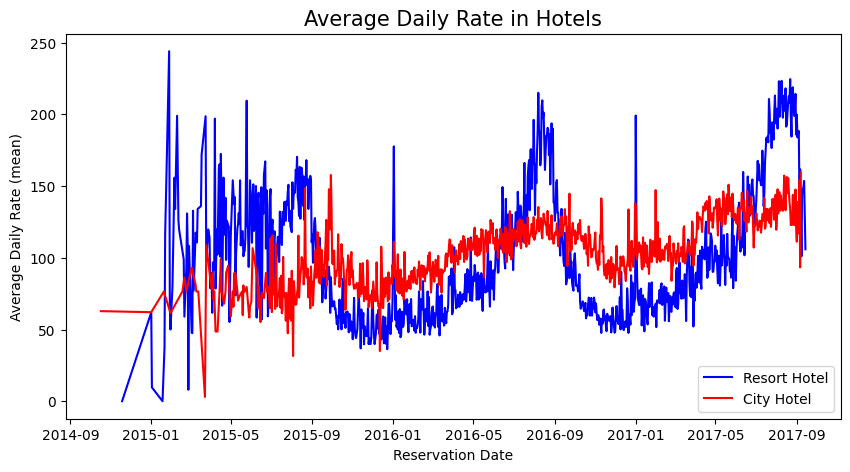

In [93]:
#Plot Average Daily Rate in hotels
plt.figure(figsize = (10,5))
plt.title('Average Daily Rate in Hotels', fontsize = 15)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel', color = 'b')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel', color = 'r')
plt.legend(loc = 'lower right', fontsize = 10)
plt.xlabel('Reservation Date')
plt.ylabel('Average Daily Rate (mean)')
plt.show()

As we can see from the graph, the ADR of city hotel is less as compared to that of resort hotel. Hence, the cancellation rate of city hotel is high.
The hikes in the graph can be of weekends when the reservaion rates are high.

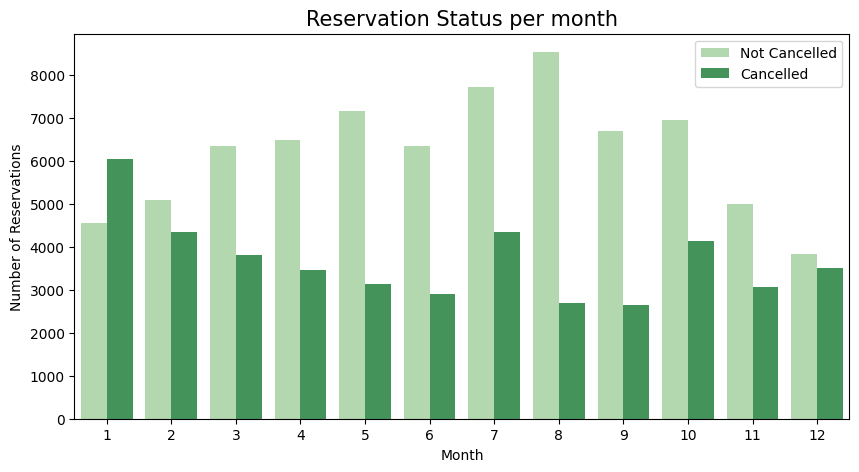

In [94]:
#Plot according to reservation months
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'Greens')
plt.title('Reservation Status per month', size = 15)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

After plotting the graph for reservation status by month, we can say that the highest number of hotel bookings are cancelled during January and lowest on August and September. The highest number of booking is made during August. So there is a possibility that during August the prices of the hotels are less as compared to other months as the cancellation rates are lowest and booking rates are highest. Another possibility is that the tourists like to visit the place during the month of July and August and not so much during the winters that is December and January.

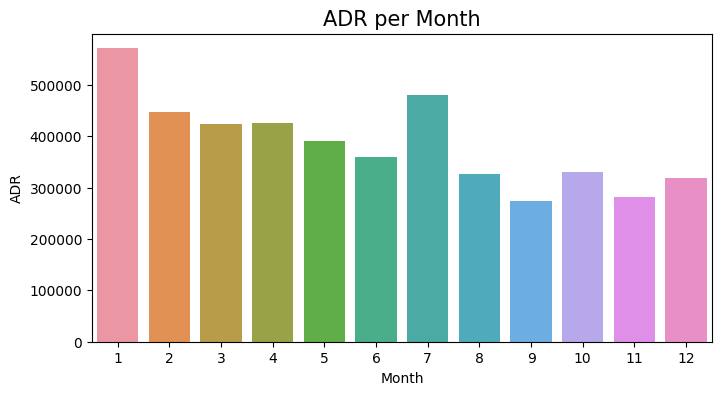

In [95]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'month', y = 'adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.title('ADR per Month', size = 15)
plt.xlabel('Month')
plt.ylabel('ADR')
plt.show()

From the plot above, we can note that January has the highest ADR and September and November has the lowest ADR. August and October having the second lowest ADR. This makes up to one of the factors for most number of bookings in August and low cancellation rate in August and September. January has less number of bookings with high cancellation rate.

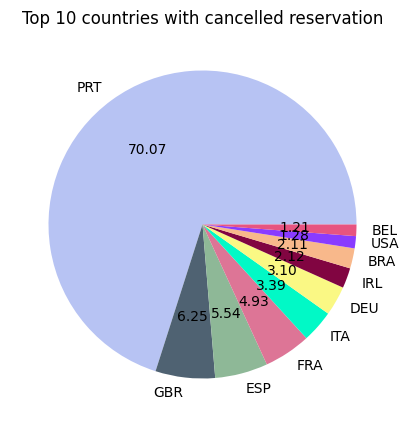

In [98]:
#Cancellation rate for different countries
cancelled_data = df[df['is_canceled'] == 1]
top_country = cancelled_data['country'].value_counts()[:10]
colors = ['#B7C3F3', '#4F6272', '#8EB897', '#DD7596', '#01F9C6', '#FAF884', '#810541', '#F8B88B', '#893BFF', '#E75480']
plt.figure(figsize = (5,5))
plt.title('Top 10 countries with cancelled reservation')
plt.pie(top_country, autopct = '%.2f', labels = top_country.index, colors = colors)
plt.show()

The pie chart above displays that Portugal has the highest cancellation rate for hotel bookings as compared to other countries.

In [99]:
#Market segment count
df['market_segment'].value_counts(normalize = True)*100

Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: market_segment, dtype: float64

From the above data we can see that bookings are majorly done through online TA.

In [63]:
#Market segment for cancelled bookings
cancelled_data['market_segment'].value_counts(normalize = True)*100

Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: market_segment, dtype: float64

The numbers clearly show that most number of cancellations are done for the bookings made by online TA.

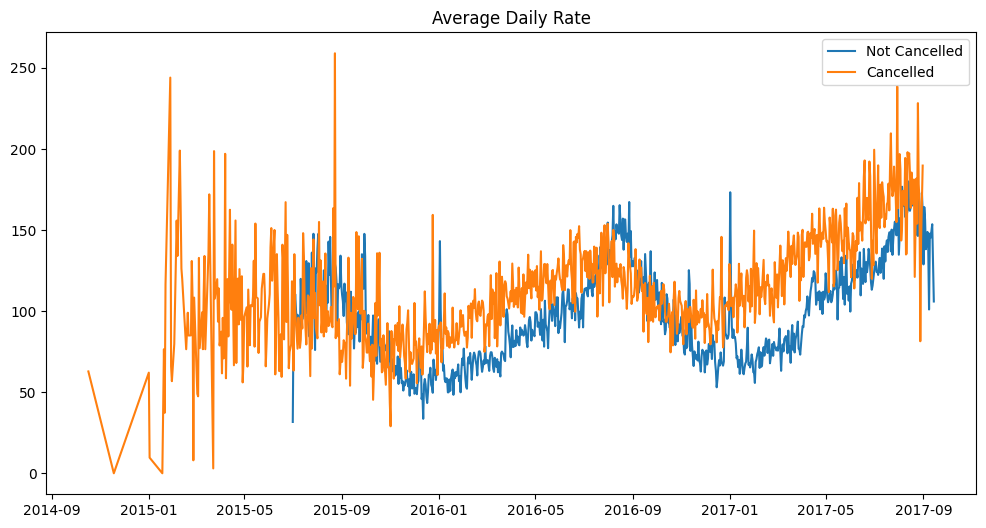

In [100]:
#ADR for reservation status
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (12,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'Cancelled')
plt.legend()
plt.show()

We can conclude that if ADR is high then cancellation rate is also high but booking rate is low as seen in Resort hotels and if ADR is low, the booking cancellations are also low and booking rate is high as seen in City hotels.

In [101]:
#Converting the modified data into csv file to create PowerBI dashboard
df.to_csv('drive/My Drive/Colab Notebooks/Dataset/hotel_booking_v1.csv')